# Homework 1: Frequency Modulated Continuous Wave (FMCW) Radar
#### GEOPH 597: CUAHSI Virtual University - Microwave Radar Remote Sensing

Steven Pestana, November 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Signal processing functions:
from scipy.signal import decimate

In [2]:
# Optional: apply a window function to the signal before fft: (Hanning, Hamming, Kaiser, or None)
windowf = None

## 1. Simulate an FMCW Signal
Simulate an FMCW signal that sweeps 200-1600 KHz (bandwidth), in 0.0001 seconds (pulse length).

#### 1.1 Create time and frequency vectors, and plot:

Create time array:

In [3]:
dt = 5e-9 # delta t of 5 nanoseconds
pl = 1e-4 # pulse length in seconds
n = np.int(pl/dt) # number of time steps (must be an integer)
t = np.linspace(0,pl,n) # create linear time array

Create frequency array:

In [4]:
fl = 200e3 # low frequency, 200 KHz
fh = 1600e3 # high frequency, 1600 KHz
bw = fh - fl # bandwidth
f = fl + (bw/pl)*t # create linear frequency array as a function of time

v = 2.998e8 # velocity, speed of light

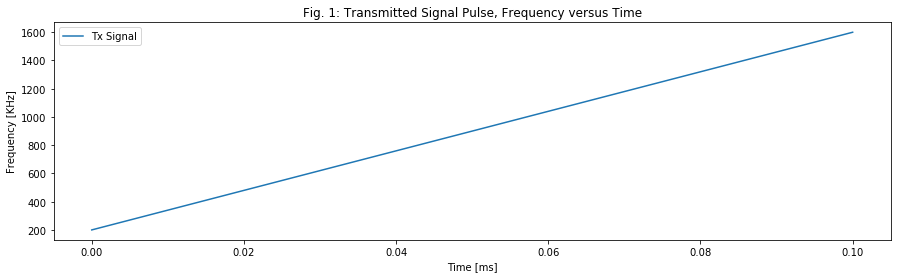

In [5]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Signal') # convert to KHz and ms for ease of reading and plot
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.title('Fig. 1: Transmitted Signal Pulse, Frequency versus Time')
plt.legend(loc='best')
#plt.savefig('figure1.jpg',dpi=200);

#### 1.2 Create Voltage vector and plot:

In [6]:
Eo = 2 # amplitude of 2 volts
z = 0 # assume a distance from the antenna

# Define a function to calculate voltage versus time given z, t, f, and v
def E(z,t,f,v,Eo):
    l = v/f                    # lambda, wavelength, from speed of light and frequency
    a = ((2*np.pi)/l)*z        # part of exponential in equation below
    b = (2*np.pi*f*t)          # part of exponential in equation below
    i = 0+1j                   # sqrt(-1)
    Ezt = Eo * np.exp(i*(a-b)) # calculate the voltage at each time step for the duration of the Tx chirp
    return Ezt

Ezt = E(z,t,f,v,Eo)

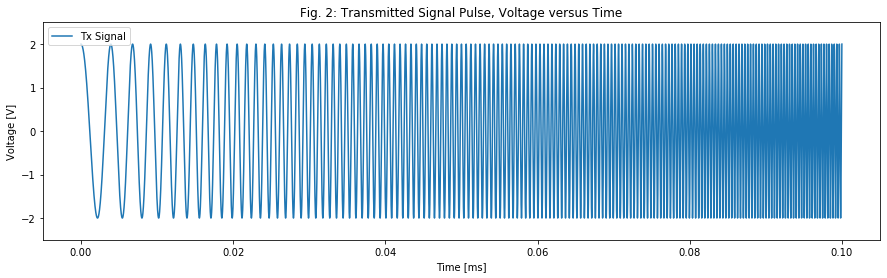

In [7]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,Ezt.real,label='Tx Signal')
plt.ylim((-2.5,2.5))
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 2: Transmitted Signal Pulse, Voltage versus Time')
plt.legend(loc='best')
#plt.savefig('figure2.jpg',dpi=200);

#### 1.3 Calculate reflection from first target, plot frequency versus time:

In [8]:
d_1 = 1500           # distance to first target = 1500 m
twd_1 = d_1 * 2      # two-way distance
twt_1 = twd_1/v      # two-way travel time = two-way distance / speed of light
t_1 = t+twt_1        # t - twt time array for first target
f_1 = fl + (bw/pl)*t # reflected frequency as a function of time for first target
print('Two-way travel time to {} m target: {} ms'.format(d_1,np.round(twt_1/1e-3,3)))

Two-way travel time to 1500 m target: 0.01 ms


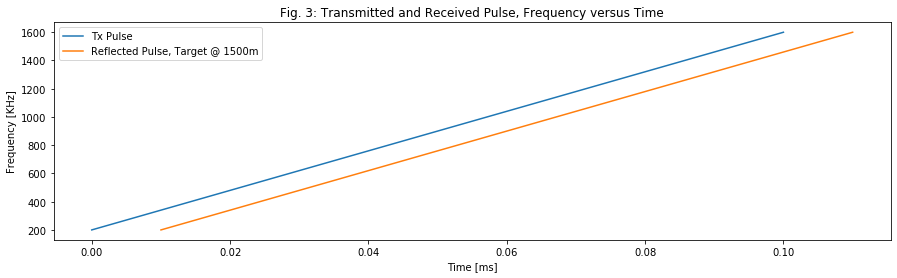

In [9]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Pulse') # convert to KHz and ms for ease of reading and plot
plt.plot(t_1/1e-3,f_1/1e3,label='Reflected Pulse, Target @ 1500m')
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.title('Fig. 3: Transmitted and Received Pulse, Frequency versus Time')
plt.legend(loc='best')
#plt.savefig('figure3.jpg',dpi=200);

#### 1.4 Calculate and plot recieved wave voltage versus time:

In [10]:
Eo_1 = 0.5 # attenuated 0.5 V signal recieved at the antenna
Ezt_1 = E(z,t,f_1,v,Eo_1) # reflected voltage as a function of time

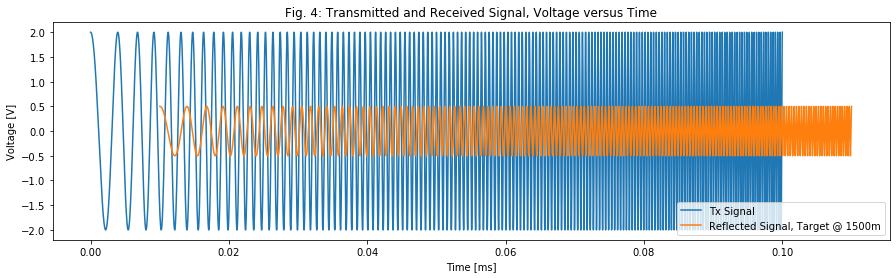

In [11]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,Ezt.real,label='Tx Signal')
plt.plot(t_1/1e-3,Ezt_1.real,label='Reflected Signal, Target @ 1500m')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 4: Transmitted and Received Signal, Voltage versus Time')
plt.legend(loc='best')
#plt.savefig('figure4.jpg',dpi=200);

#### 1.5 Calculate for a target at 1800 m distance:

In [12]:
d_2 = 1800           # distance to second target = 1800 m
twd_2 = d_2 * 2      # two-way distance
twt_2 = twd_2/v      # two-way travel time = two-way distance / speed of light
t_2 = t+twt_2        # t - twt time array for second target
f_2 = fl + (bw/pl)*t # reflected frequency as a function of time for second target
print('Two-way travel time to {} m target: {} ms'.format(d_2,np.round(twt_2/1e-3,3)))

Two-way travel time to 1800 m target: 0.012 ms


Plot frequency versus time for transmitted and the two recieved signals.

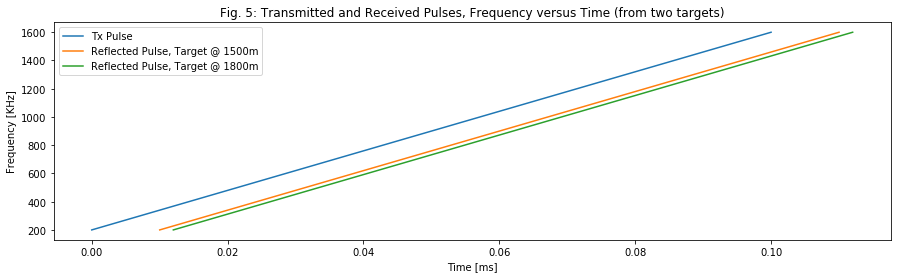

In [13]:
plt.figure(figsize=(15,4))
plt.plot(t/1e-3,f/1e3,label='Tx Pulse') # convert to KHz and ms for ease of reading and plot
plt.plot(t_1/1e-3,f_1/1e3,label='Reflected Pulse, Target @ 1500m')
plt.plot(t_2/1e-3,f_2/1e3,label='Reflected Pulse, Target @ 1800m')
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [ms]')
plt.title('Fig. 5: Transmitted and Received Pulses, Frequency versus Time (from two targets)')
plt.legend(loc='best')
#plt.savefig('figure5.jpg',dpi=200);

In [14]:
Eo_2 = 0.1 # attenuated 0.1 V signal recieved at the antenna
Ezt_2 = E(z,t,f_2,v,Eo_2) # reflected voltage as a function of time

Pad all transmitted and recieved signals with zeros to put them all on the same timeline

In [15]:
# Pad reflected signal from target 1 with voltage=0
len_1 = int(np.ceil(twt_1/dt))
zeros_1 = np.zeros((len_1))
Rx_1 = np.append(zeros_1,Ezt_1)
len_3 = int(np.floor((twt_2-twt_1)/dt))
zeros_3 = np.zeros((len_3))
Rx_1 = np.append(Rx_1,zeros_3)

# Pad relfected signal from target 2 with voltage=0
len_2 = int(np.ceil(twt_2/dt))
zeros_2 = np.zeros((len_2))
Rx_2 = np.append(zeros_2,Ezt_2)

# Pad transmitted signal with voltage=0
Tx = np.append(Ezt,zeros_2)

# Create time array to capture all Tx and Rx signals
T = np.linspace(0,pl+twt_2,Tx.size) # create linear time array) # extend original t to lengt of Tx

Plot the Tx, Rx_1, and Rx_2 singnals, now all properly padded with 0s across the total time range.

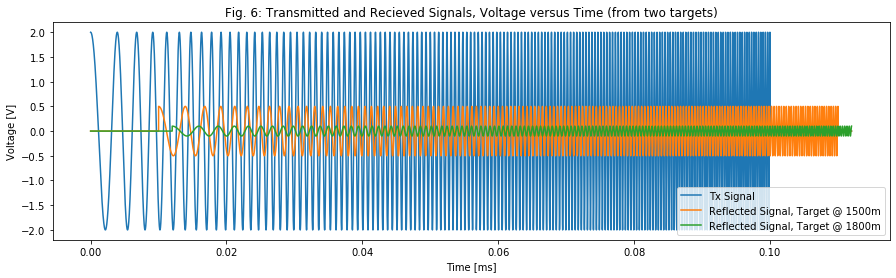

In [16]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,Tx.real,label='Tx Signal')
plt.plot(T/1e-3,Rx_1.real,label='Reflected Signal, Target @ 1500m')
plt.plot(T/1e-3,Rx_2.real,label='Reflected Signal, Target @ 1800m')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 6: Transmitted and Recieved Signals, Voltage versus Time (from two targets)')
plt.legend(loc='best')
#plt.savefig('figure6.jpg',dpi=200);

#### 1.6 Combine the Rx signals from targets 1 and 2 into a single Rx signal.

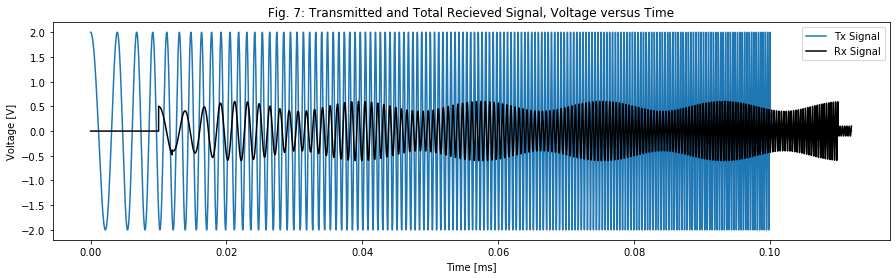

In [17]:
Rx = Rx_1 + Rx_2 # Total recieved signal is the sum of the two Rx from each target

plt.figure(figsize=(15,4))
plt.plot(T/1e-3,Tx.real,label='Tx Signal')
plt.plot(T/1e-3,Rx.real,'k',label='Rx Signal')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 7: Transmitted and Total Recieved Signal, Voltage versus Time')
plt.legend(loc='best')
#plt.savefig('figure7.jpg',dpi=200);

#### 1.7 FMCW Total Recieved Signal:

In [18]:
# Calculate the portion of Tx used by the FMCW mixer (scaled)
sa = 0.01 # sample amplitude scale (1/100th of Tx amplitude)
Ezt_0 = E(z,t,f,v,Eo*sa)
# Pad transmitted signal with voltage=0 for later time steps
Tx_0 = np.append(Ezt_0,zeros_2)

# Compute total mixed signal Rx
M = np.real(Tx_0) * np.real(Rx) # Mixed Rx signal

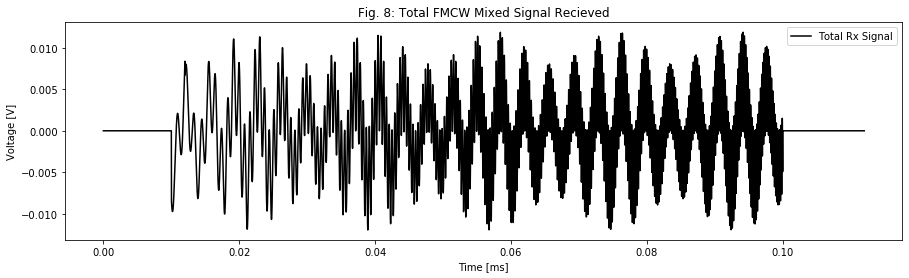

In [19]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,M.real,c='k',label='Total Rx Signal')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 8: Total FMCW Mixed Signal Recieved')
plt.legend(loc='best')
#plt.savefig('figure8.jpg',dpi=200);

## 2. Record the FMCW Signal

#### 2.10 Use a low-pass filter, and resample at a rate 100 times slower than the true signal:
(Using [scipy.signal.decimate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.decimate.html) function, documentation recommends performing decimation in multiple steps with IIR if factor > 13)

In [20]:
_s = decimate(M,10,ftype='iir') # I want to downsample by a factor of 100, so I do 10 first
s = decimate(_s,10,ftype='iir') # and then 10 a second time

t_s = np.linspace(0,T.max(),int(T.size/100)+1) # create new time array, sampled by 1/100
dt_s = t_s[2] - t_s[0] # new sampling timestep

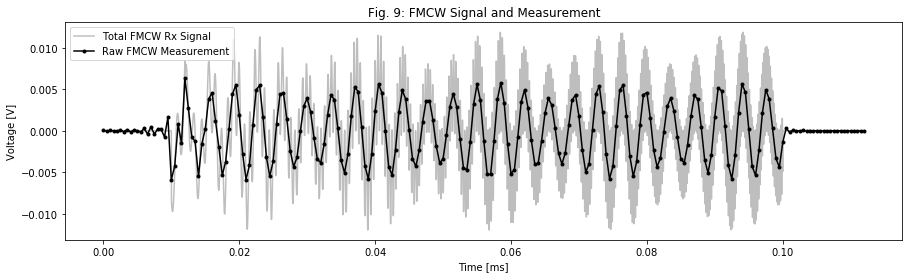

In [21]:
plt.figure(figsize=(15,4))
plt.plot(T/1e-3,M,c='tab:grey',alpha=0.5,label='Total FMCW Rx Signal')
plt.plot(t_s/1e-3,s,'.-k',label='Raw FMCW Measurement')
plt.ylabel('Voltage [V]')
plt.xlabel('Time [ms]')
plt.title('Fig. 9: FMCW Signal and Measurement')
plt.legend(loc='best')
#plt.savefig('figure9.jpg',dpi=200);

## 3. Processing the FMCW Signal:

#### 3.11 Use FFT to get the frequency spectrum of this signal:
Using the [numpy.fft.fft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft) and [numpy.fft.fftfreq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq) functions here, and optionally apply a window function prior to running fft ([Hanning](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hanning.html), [Hamming](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hamming.html), or [Kaiser](https://docs.scipy.org/doc/numpy/reference/generated/numpy.kaiser.html)).

In [22]:
# Optional: apply a window function to s before fft:
if windowf == 'Hanning':
    s = s*np.hanning(s.size)
if windowf == 'Hamming':
    s = s*np.hamming(s.size)
if windowf == 'Kaiser':
    s = s*np.kaiser(s.size,20) # (numpy documentation suggests starting with, beta=14)
else:
    None

In [23]:
n = 2**13 # number of sample points

# Compute FFT on s
_sf = np.fft.fft(s,n)
sf = np.abs(_sf[:n//2]) # take absolute value, limit to positive freqs only (the first half of what fft gives us)


# Create freq array for s, in cycles per second (Hz)
_freq = np.fft.fftfreq(_sf.size, dt_s)
freq = _freq[:n//2] # limit to positive freqs only (the first half of what fft gives us)

Text(0.5, 0, '$\\Delta$ Frequency (KHz)')

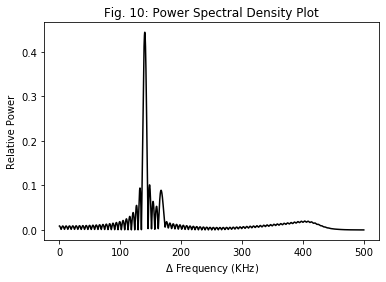

In [24]:
# Plot PSD:
plt.plot(freq/1e3,sf,'k')
plt.title('Fig. 10: Power Spectral Density Plot')
plt.ylabel('Relative Power')
plt.xlabel('$\Delta$ Frequency (KHz)')
#plt.savefig('figure10.jpg',dpi=200);

Convert delta frequency shift to distances:

In [25]:
twt = freq*(pl/bw) # calculate two way travel time from these frequencies
dist = (v * twt) / 2 # caluclate distance from the two way travel times

#### 3.12 Plot power versus distance:

Text(0.5, 0, 'Distance (m)')

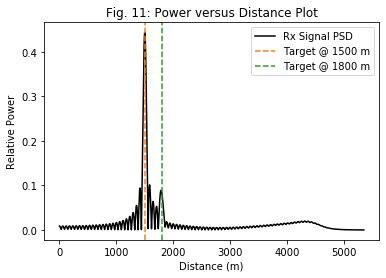

In [26]:
plt.plot(dist,sf.real,'k',label='Rx Signal PSD')
plt.axvline(1500,c='tab:orange',linestyle='--',label='Target @ 1500 m')
plt.axvline(1800,c='tab:green',linestyle='--',label='Target @ 1800 m')

plt.title('Fig. 11: Power versus Distance Plot')
plt.ylabel('Relative Power')
plt.legend()
plt.xlabel('Distance (m)')
#plt.savefig('figure11.jpg',dpi=200);

***

Calculate the theoretical range resolution (minimum distance between targets that can be resolved):

In [27]:
dz = v/(2*bw)
print('Theoretical range resolution dz = {} m'.format(int(np.round(dz,0))))

Theoretical range resolution dz = 107 m


***
Use the below plot to show the results of experimenting with different fft sample sizes, bandwidths, filtering methods.

In [28]:
#plt.plot(dist,sf.real,'k',label='Rx Signal PSD')
#plt.axvline(1500,c='tab:orange',linestyle='--',label='Target @ 1500 m')
#plt.axvline(1800,c='tab:green',linestyle='--',label='Target @ 1800 m')
#
#plt.xlim((500,2500))
#plt.title('Fig. 24: Power versus Distance Plot \nfft with {} window (B=20)'.format(windowf))
#plt.ylabel('Relative Power')
#plt.legend()
#plt.xlabel('Distance (m)')
#plt.savefig('figure24.jpg',dpi=200);

***